In [1]:
 import pandas as pd
import numpy as np

from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from IPython.display import display
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
print('Packages for Mathematical Computation and visualization imported!')

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

Packages for Mathematical Computation and visualization imported!
Pipeline and preprocessing packages imported!


In [4]:
cork = pd.read_csv('cork-subset.csv', index_col = 'Unnamed: 0')

In [7]:
cork.shape

(5846, 17)

In [8]:
from geopy.geocoders import Nominatim
import time
geolocator = Nominatim(user_agent = "fyp-cork")
add = np.array(cork['Address'])
add1 = np.array(cork['Neighbourhood'])
lat2 = []
lon2 = []
for i in range(len(add)):
    time.sleep(1.6)
    location = geolocator.geocode(add[i])
    #print(location.address)
    if location != None:
        #print((location.latitude, location.longitude))
        lat2.append(location.latitude)
        lon2.append(location.longitude)
    else:
        location1 = geolocator.geocode(add1[i])
        if location1 != None:
            lat2.append(location1.latitude)
            lon2.append(location1.longitude)
        else:
            lat2.append("None")
            lon2.append("None")

In [9]:
test11 = cork.copy()
test11['Latitude'] = lat2
test11['Longitude'] = lon2

In [11]:
test12 = test11.loc[test11['Latitude'] != 'None']

In [12]:
test12.shape

(5275, 19)

In [14]:
#test12.to_csv('cork-subset-geo.csv')

In [15]:
test12.head()

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment,Neighbourhood,Province,Estate,PriceInflation,Eircode,Latitude,Longitude
94122,"Main St, Castletownsend, Cork",Cork,312500.0,1,1,1,2,2014,1,Cork City,South-West (IE),0,Castletownsend Cork,Munster,Other,591463.41,T12,51.535997,-9.181571
94123,"10 Deerpark Court, Friars Walk, Cork",Cork,280000.0,1,1,1,2,2014,1,Cork City,South-West (IE),0,Friars Walk Cork,Munster,Estate,529951.22,T12,51.891104,-8.474261
94124,"30 Whitepoint Ave Cobh, Cork",Cork,370000.0,1,1,1,1,2014,1,Cork City,South-West (IE),0,Whitepoint Ave Cobh Cork,Munster,Estate,700292.68,T12,51.844802,-8.312442
94125,"43 Richmond Hill, Cork",Cork,130000.0,1,1,1,1,2014,1,Cork City,South-West (IE),0,Richmond Hill Cork,Munster,Estate,246048.78,T12,51.903869,-8.471192
94126,"Vermont, Ballyhooly Rd, Cork",Cork,155000.0,1,1,1,1,2014,1,Cork City,South-West (IE),0,Ballyhooly Road Cork,Munster,Other,293365.85,T12,51.91138,-8.450581


In [16]:
test12['Latitude'].max()

53.344058

In [17]:
test12['Latitude'].min()

-33.733273

## Distance to Major Points 

In [18]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km 

In [39]:
## city centre latitude, longitude
# 51.8983° N, 8.4726° W
import geopy.distance
center_latitude = 51.8983
center_longitude = -8.4726
vals_lon = np.array(test12['Longitude'])
vals_lat = np.array(test12['Latitude'])
distance = []
for i in range(len(vals_lon)):
    co_ords_2 = (vals_lon[i], vals_lat[i])
    dist = haversine(center_longitude, center_latitude, vals_lon[i], vals_lat[i])
    distance.append(dist)

In [40]:
max(distance)

13.707300094912206

In [41]:
min(distance)

0.08488144383611412

In [42]:
test12['DistanceCenter'] = distance

In [43]:
test12 = test12.loc[test12['DistanceCenter'] <= 15]

In [44]:
test12.shape

(4821, 20)

## Closest School

In [45]:
prim = pd.read_csv('primary_schools_2013_2014.csv')

In [46]:
prim = prim.loc[prim['County'] == 'Cork']

In [47]:
prim = prim[['Off_Name', 'Add_1', 'County', 'Ethos', 'Long', 'Lat']]

In [48]:
vals = np.array(test12['Longitude'])
vals1 = np.array(test12['Latitude'])
schoollon = np.array(prim['Long'])
schoollat = np.array(prim['Lat'])
distance_school = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances = []
    for j in range(len(schoollat)): # B
        lat2 = schoollat[j]
        lon2 = schoollon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances.append(dist)

    min_distance = min(distances)
    distance_school.append(min_distance)

In [49]:
test12['DistanceSchool'] = distance_school

In [52]:
## reasonable values
test12['DistanceSchool'].max()

3.1433438966294367

In [53]:
test12.drop(columns = ['Estate', 'Not Full Market Price', 'Region', 'Province'], inplace = True)

## Nearest Park

Using this [website.](https://data.corkcity.ie/dataset/cork-city-parks)

In [54]:
parks = pd.read_csv('cork-parks.csv')
parks.head()

,OBJECTID,Name,Address,Website,Type,MUGA,Longitude,Latitude
0,1,Atlantic Pond,"Ballintemple, Cork",https://www.corkcity.ie/corkcityco/en/things-t...,Walk,NaN,-8.430833,51.900248
1,2,Blackrock Amenity Walk,"Castle Road, Blackrock, Cork",https://www.corkcity.ie/corkcityco/en/things-t...,Walk,NaN,-8.402421,51.900298
2,3,South Parish Walk,"Queens Old Castle, Grand Parade, Cork",https://www.corkcity.ie/corkcityco/en/things-t...,Walk,NaN,-8.475779,51.898477
3,4,Central Island Walk,"Daunt Square, Cork",https://www.corkcity.ie/corkcityco/en/things-t...,Walk,NaN,-8.475857,51.898563
4,5,Shandon Walk,"Shandon, Cork",https://www.corkcity.ie/corkcityco/en/things-t...,Walk,NaN,-8.476350,51.902808


In [55]:
parks = parks[['Name', 'Address', 'Longitude', 'Latitude']]

In [56]:
vals = np.array(test12['Longitude'])
vals1 = np.array(test12['Latitude'])
parklon = np.array(parks['Longitude'])
parklat = np.array(parks['Latitude'])
distance_park = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances_park = []
    for j in range(len(parklat)):
        lat2 = parklat[j]
        lon2 = parklon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances_park.append(dist)

    min_distance = min(distances_park)
    distance_park.append(min_distance)

In [57]:
max(distance_park)

6.100679342924176

In [58]:
test12['DistancePark'] = distance_park

### Parking Locations

In [59]:
parking = pd.read_csv('cork-parking.csv')

In [60]:
parking

,_id,identifier,name,spaces,free_spaces,opening_times,notes,latitude,longitude,date,price,height_restrictions
0,1,1,Paul Street,749,362,"Monday - Saturday 07.30 -00.00, Sunday 11.30 -...",NaN,51.900542,-8.475415,2022-03-31T11:50:03,€2.30 per hour; Flat rate €3.50 from 18.30-24.00,2m
1,2,2,North Main Street,330,88,"Monday - Saturday 07.30 - 21.30, Sunday 11.30 ...",NaN,51.901008,-8.477804,2022-03-31T11:50:03,€1.70 per hour; Flat rate €2.00 from 18.30-21.30,2m
2,3,9,Black Ash Park & Ride,935,817,Monday - Saturday 06:45 - 20:00,NaN,51.878279,-8.466956,2022-03-31T11:50:00,€5 per day,2.1m
3,4,103,City Hall - Eglington Street,436,108,24/7,NaN,51.896579,-8.464302,2022-03-31T10:54:02,"€2.90 per hour, max. €13 per day",2m
4,5,102,Carrolls Quay,376,122,24/7,NaN,51.901788,-8.472013,2022-03-31T10:54:02,€2.80 per hour,2m
5,6,101,Grand Parade,352,245,24/7,NaN,51.896562,-8.474557,2022-02-16T11:34:02,€3 per hour,1.85m
6,7,108,Merchants Quay,710,432,"Monday - Thursday and Saturday 08.00 - 19.00, ...",NaN,51.899577,-8.468648,2022-03-31T11:50:15,€3 per hour,1.98m
7,8,104,Saint Finbarr's,350,2,24/7,NaN,51.896723,-8.482056,2022-03-04T02:11:01,€2.80 per hour,2m


In [61]:
vals = np.array(test12['Longitude'])
vals1 = np.array(test12['Latitude'])
carlon = np.array(parking['longitude'])
carlat = np.array(parking['latitude'])
distance_car = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances_car = []
    for j in range(len(carlat)):
        lat2 = carlat[j]
        lon2 = carlon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances_car.append(dist)

    min_distance = min(distances_car)
    distance_car.append(min_distance)

In [63]:
max(distance_car)

13.16961300656681

In [64]:
test12['DistanceCar'] = distance_car

In [65]:
#test12.to_csv('corkgeo-features.csv')

### Plot Points

City boundary downloaded from [here](https://data.corkcity.ie/dataset/cork-city-boundary).

In [66]:
import geopandas as gpd
cork_map = gpd.read_file('cork-city-boundary\Cork City BoundaryWGS84.shp')  #reading the shape file for our maps 
cork_map.head(1)

,Latitude,Longtitude,ENGLISH,CONTAE,COUNTY,AREA,PROVINCE,geometry
0,51.905,-8.384,CORK CITY COUNCIL,Corcaigh,CORK,186597605.50694406,Munster,"POLYGON ((-8.38436 51.90533, -8.38425 51.90529..."


Text(0.5, 1.0, 'Plot of the Locations of Properties used in this dataset')

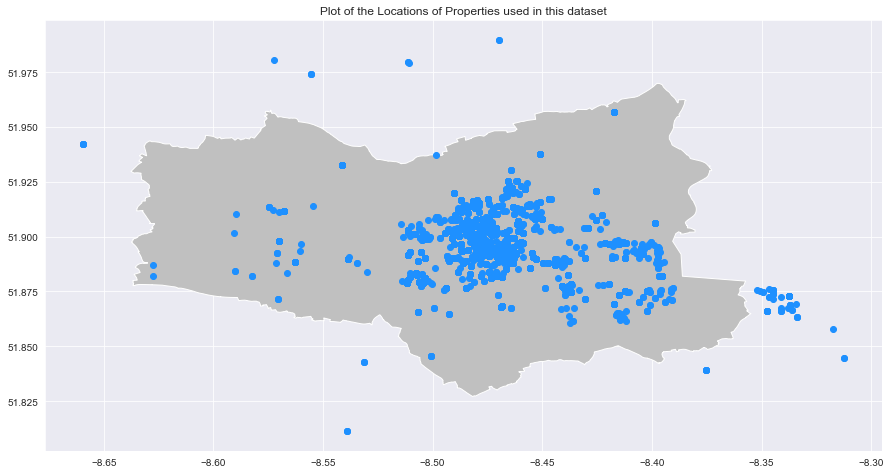

In [69]:
fig, ax = plt.subplots(figsize = (15, 15))
cork_map.plot(ax = ax, color = 'silver')
plt.scatter(x = test12['Longitude'], y = test12['Latitude'], color = 'dodgerblue')
plt.title('Plot of the Locations of Properties used in this dataset')

### Missing Values

In [71]:
extra = pd.read_csv('cork-all.csv', index_col = 'Unnamed: 0')

In [87]:
from geopy.geocoders import Nominatim
import time
#geolocator = Nominatim(user_agent = "fyp-c")
#add = np.array(extra['Address'])
#add1 = np.array(extra['Neighbourhood'])
#lat2 = []
#lon2 = []
#for i in range(len(add)):
#    time.sleep(3)
#    location = geolocator.geocode(add[i], timeout = None)
#    #print(location.address)
#    if location != None:
        #print((location.latitude, location.longitude))
#        lat2.append(location.latitude)
#        lon2.append(location.longitude)
#    else:
#        location1 = geolocator.geocode(add1[i], timeout = None)
#        if location1 != None:
#            lat2.append(location1.latitude)
#            lon2.append(location1.longitude)
#        else:
#            lat2.append("None")
#            lon2.append("None")

In [88]:
len(lat2)

1199

In [89]:
#done1 = extra.iloc[1114:]
#done1['Longitude'] = lon2
#done1['Latitude'] = lat2

C:\Users\user\AppData\Local\Temp/ipykernel_6484/2745247643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  done1['Longitude'] = lon2
C:\Users\user\AppData\Local\Temp/ipykernel_6484/2745247643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  done1['Latitude'] = lat2


In [90]:
done.head(1)

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment,Neighbourhood,Province,Estate,PriceInflation,Eircode,Longitude,Latitude
94261,"Fatima House, Grange Road, Douglas",Cork,240000.0,1,1,1,1,2014,1,Douglas,South-West (IE),0,Grange Road Douglas,Munster,Other,454243.9,T12,-8.438834,51.870688


In [91]:
done1.head(1)

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment,Neighbourhood,Province,Estate,PriceInflation,Eircode,Longitude,Latitude
114536,"3 Church Court, Church Rd, Douglas",Cork,235000.0,1,1,1,1,2016,9,Douglas,South-West (IE),0,Church Road Douglas,Munster,Estate,333687.1,T12,-8.434447,51.873974


In [95]:
extrac = done.append(done1)

In [96]:
extrac = extrac.loc[extrac['Longitude'] != 'None']

In [125]:
#extrac.to_csv('outskirts-cork-geo.csv')

In [99]:
## center
import geopy.distance
center_latitude = 51.8983
center_longitude = -8.4726
vals_lon = np.array(extrac['Longitude'])
vals_lat = np.array(extrac['Latitude'])
distancec = []
for i in range(len(vals_lon)):
    co_ords_2 = (vals_lon[i], vals_lat[i])
    dist = haversine(center_longitude, center_latitude, vals_lon[i], vals_lat[i])
    distancec.append(dist)

In [100]:
max(distancec)

15457.267467798394

In [101]:
extrac['DistanceCenter'] = distancec

In [106]:
extrac = extrac.loc[extrac['DistanceCenter'] < 10]

In [107]:
## schools
vals = np.array(extrac['Longitude'])
vals1 = np.array(extrac['Latitude'])
schoollon = np.array(prim['Long'])
schoollat = np.array(prim['Lat'])
distance_schools = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances = []
    for j in range(len(schoollat)): # B
        lat2 = schoollat[j]
        lon2 = schoollon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances.append(dist)

    min_distance = min(distances)
    distance_schools.append(min_distance)

In [108]:
extrac['DistanceSchool'] = distance_schools

In [109]:
## parks
vals = np.array(extrac['Longitude'])
vals1 = np.array(extrac['Latitude'])
parklon = np.array(parks['Longitude'])
parklat = np.array(parks['Latitude'])
distance_parkc = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances_park = []
    for j in range(len(parklat)):
        lat2 = parklat[j]
        lon2 = parklon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances_park.append(dist)

    min_distance = min(distances_park)
    distance_parkc.append(min_distance)

In [110]:
extrac['DistancePark'] = distance_parkc

In [111]:
## parking
vals = np.array(extrac['Longitude'])
vals1 = np.array(extrac['Latitude'])
carlon = np.array(parking['longitude'])
carlat = np.array(parking['latitude'])
distance_carc = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances_car = []
    for j in range(len(carlat)):
        lat2 = carlat[j]
        lon2 = carlon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances_car.append(dist)

    min_distance = min(distances_car)
    distance_carc.append(min_distance)

In [112]:
extrac['DistanceCar'] = distance_carc

In [113]:
vals = np.array(extrac['Longitude'])
vals1 = np.array(extrac['Latitude'])
carlon = np.array(parking['longitude'])
carlat = np.array(parking['latitude'])
distance_car_ex = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances_car = []
    for j in range(len(carlat)):
        lat2 = carlat[j]
        lon2 = carlon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances_car.append(dist)

    min_distance = min(distances_car)
    distance_car_ex.append(min_distance)

In [121]:
extrac.drop(columns=['Estate', 'Not Full Market Price', 'Region', 'Province'], inplace = True)

In [123]:
finaldf = test12.append(extrac)

In [124]:
#finaldf.to_csv('extra-cork-coded.csv')

Text(0.5, 1.0, 'Plot of the Locations of Properties used in extended dataset')

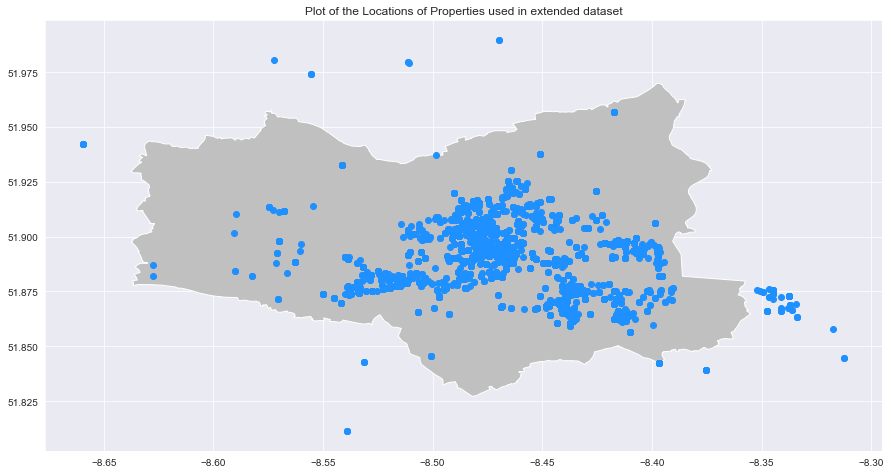

In [128]:
fig, ax = plt.subplots(figsize = (15, 15))
cork_map.plot(ax = ax, color = 'silver')
plt.scatter(x = finaldf['Longitude'], y = finaldf['Latitude'], color = 'dodgerblue')
plt.title('Plot of the Locations of Properties used in extended dataset')

In [129]:
finaldf['Town'].value_counts()

Cork City         4821
Douglas            950
Bishopstown        307
Blackrock Cork     243
Togher              82
Montenotte          41
Ballintemple         9
Name: Town, dtype: int64

In [131]:
change = finaldf.loc[finaldf['Town'] == 'Cork City']

In [135]:
finaldf.head()

,Address,County,Price (€),VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,PriceInflation,Eircode,Latitude,Longitude,DistanceCenter,DistanceSchool,DistancePark,DistanceCar
94123,"10 Deerpark Court, Friars Walk, Cork",Cork,280000.0,1,1,2,2014,1,Cork City,0,Friars Walk Cork,529951.22,T12,51.891104,-8.474261,0.808257,0.371367,0.334321,0.607264
94124,"30 Whitepoint Ave Cobh, Cork",Cork,370000.0,1,1,1,2014,1,Cork City,0,Whitepoint Ave Cobh Cork,700292.68,T12,51.844802,-8.312442,12.501636,0.597510,5.440909,11.244529
94125,"43 Richmond Hill, Cork",Cork,130000.0,1,1,1,2014,1,Cork City,0,Richmond Hill Cork,246048.78,T12,51.903869,-8.471192,0.626745,0.323214,0.129914,0.238164
94126,"Vermont, Ballyhooly Rd, Cork",Cork,155000.0,1,1,1,2014,1,Cork City,0,Ballyhooly Road Cork,293365.85,T12,51.91138,-8.450581,2.096941,0.447549,0.669517,1.805214
94127,"22 Fernwood, Wilton, Cork",Cork,210000.0,1,1,1,2014,1,Cork City,0,Wilton Cork,397463.41,T12,51.882655,-8.507208,2.943974,0.503091,0.823622,2.329469


In [174]:
areas = ['Ballinlough', 'Wilton', 'Ballyphehane', 'Rochestown', 'Farranree', 'Hollyhill', 'Blackpool', 'Grange', 'Shandon',
        "Turner's Cross", 'Turners Cross', 'Greenmount', 'Frankfield', 'Churchfield', 'Grange', 'Mahon', 'Mayfield',
        'Knocknaheeny']
adds = list(finaldf['Address'])
ts = list(finaldf['Town'])
fix = []
for i in range(len(adds)):
    st = adds[i].strip()
    spl = st.split(',')
    #print(spl)
    if spl[-1].strip() in areas:
        fix.append(spl[-1].strip())
    elif spl[-2].strip() in areas:
        fix.append(spl[-2].strip())
    else:
        fix.append(ts[i])

In [175]:
#fix

In [176]:
finaldf['Town'] = fix

In [177]:
finaldf['Town'].value_counts()

Cork City         3844
Douglas            766
Bishopstown        307
Blackrock Cork     236
Wilton             157
Ballyphehane       137
Blackpool          136
Grange             130
Ballinlough        107
Frankfield         104
Turners Cross      101
Farranree           92
Togher              82
Rochestown          72
Montenotte          41
Greenmount          39
Mahon               32
Hollyhill           20
Turner's Cross      14
Shandon             10
Churchfield         10
Ballintemple         9
Knocknaheeny         7
Name: Town, dtype: int64

In [178]:
adds = list(finaldf['Neighbourhood'])
fixs = []
for i in range(len(adds)):
    st = adds[i].strip()
    spl = st.split()
    if spl[-1].strip() == 'Cork':
        txt = adds[i] + " City"
        fixs.append(txt)
    else:
        fixs.append(adds[i])

In [180]:
finaldf['Neighbourhood'] = fixs

In [181]:
#finaldf.to_csv('cork-more-fixed.csv')